# Jakub Grabowski (151825) - grupa lab. L3
### Projekt - analiza wartości akcji Google

# Wstęp
Dane użyte w analizie pochodzą z następującego źródła: https://www.kaggle.com/datasets/bilalwaseer/google-stocks-complete.

W użytym zbiorze zawarte są dane dotyczące cen akcji pod symbolem giełdowym GOOGL na NASDAQ (akcje Alphabet.inc, czyli konglomeratu Google). Dane te można również przeglądać w Google Finance. Zakres czasowy tego zbioru danych to 09.2004 do 05.2023. Jednakże z racji na ogromne różnice między wartością akcji w pierwszych latach na giełdzie w porównaniu do obecnego przebiegu ograniczyłem zakres danych do lat 2020-2023, gdzie ceny i zachowanie GOOGL było zbliżone.

Dane zawierają w każdym wierszu informacje o dacie (Date), cenie otwarcia i zamknięcia giełdy (Open, Close), najwyżej i najniższej (Low, High) cenie tego dnia oraz informacje o wolumenie (Volume), czyli ilości akcji, które zmieniły właściciela danego dnia.

Z racji na to, że dane prezentowane mają charakter temporalny, zaś wartości akcji to dane ilościowe, to typową analizą, która przychodzi na myśl dla takiego zbioru danych jest rzecz jasna regresja liniowa.

In [2]:
# setup
library(moments)
data <- read.csv("GOOGLE.csv")
new_data <- subset(data, data$Date > "2020-01-01")
# print(new_data)
df <- data.frame(new_data)
df$Date <- as.Date(df$Date)

Warning message:
"pakiet 'moments' został zbudowany w wersji R 4.1.3"


# Histogramy
Na początek utworzymy kilka histogramów, aby zbadać generalne tendencje.

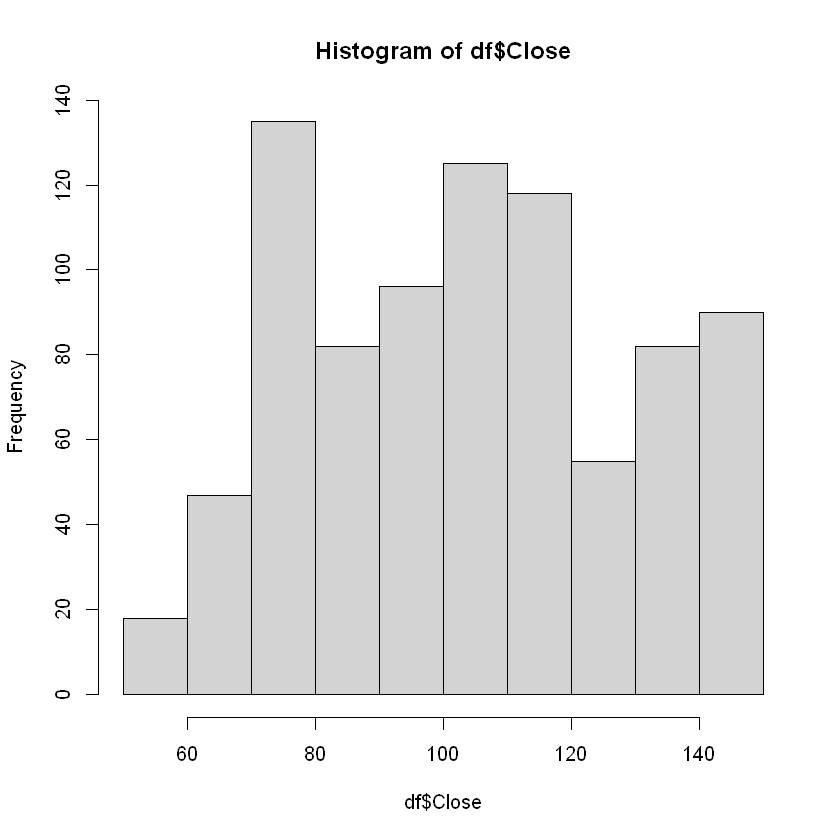

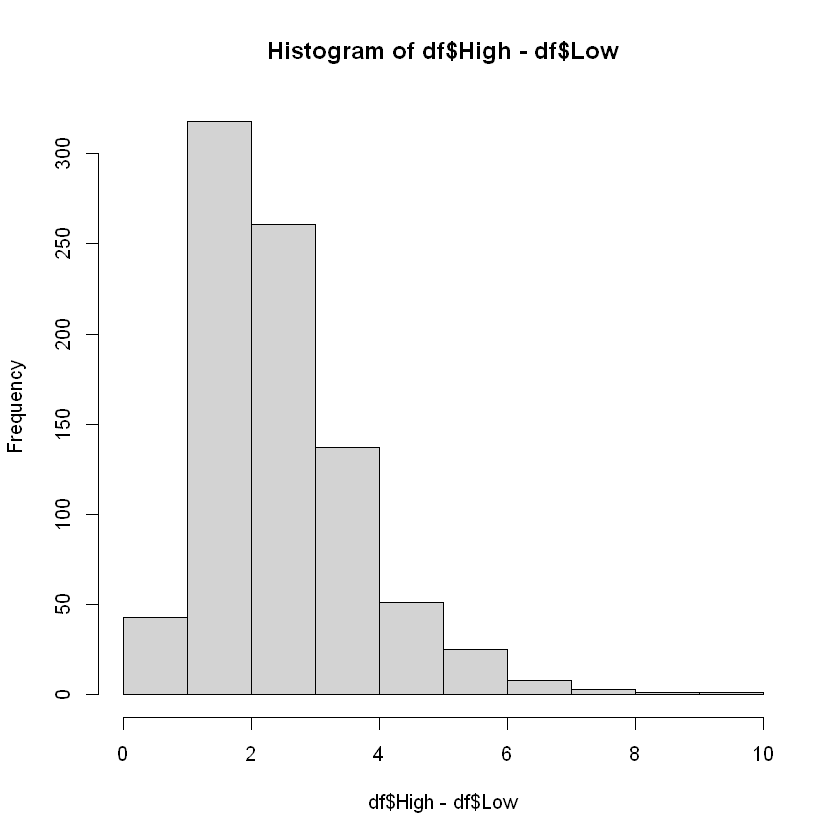

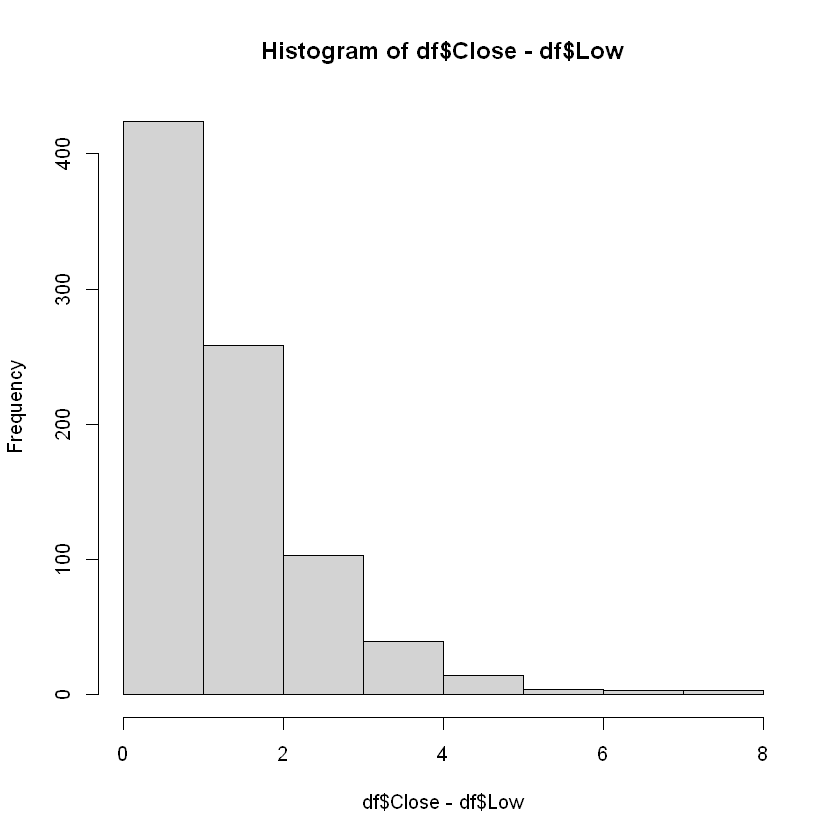

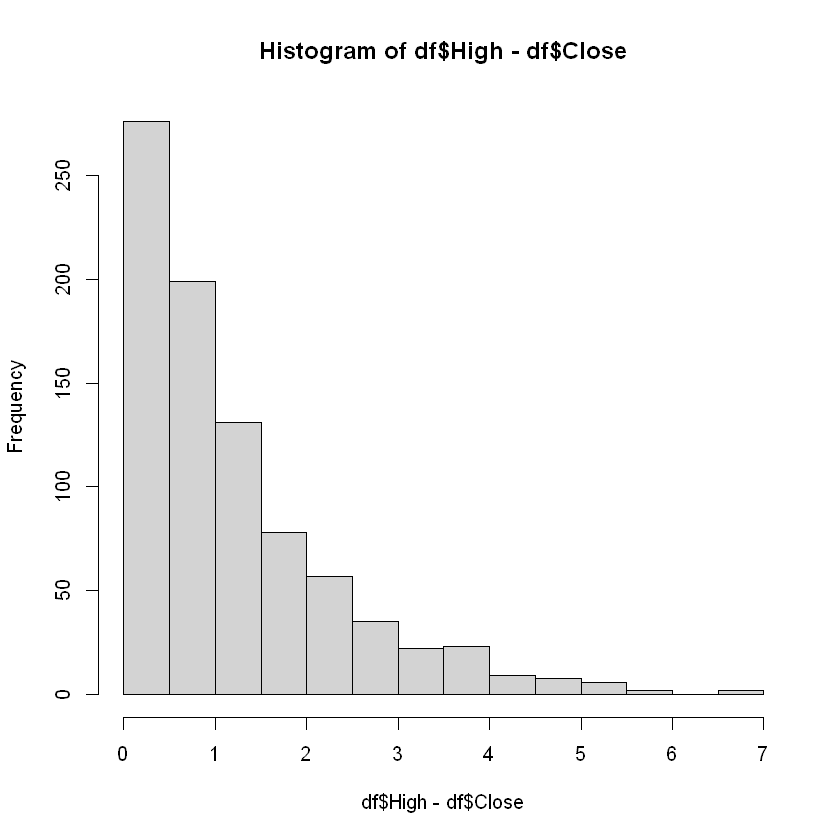

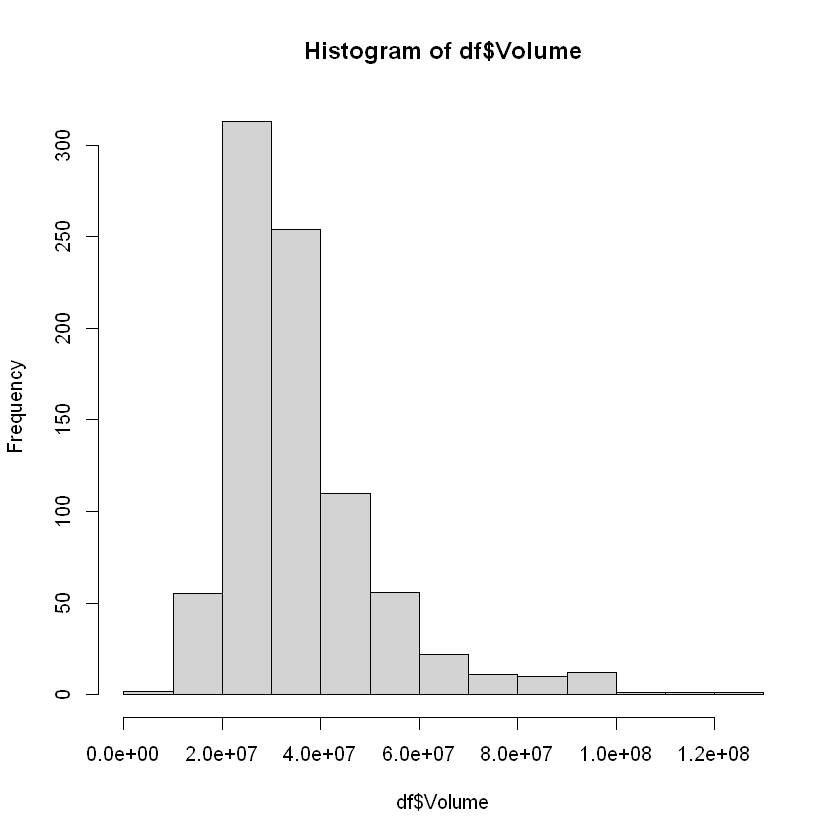

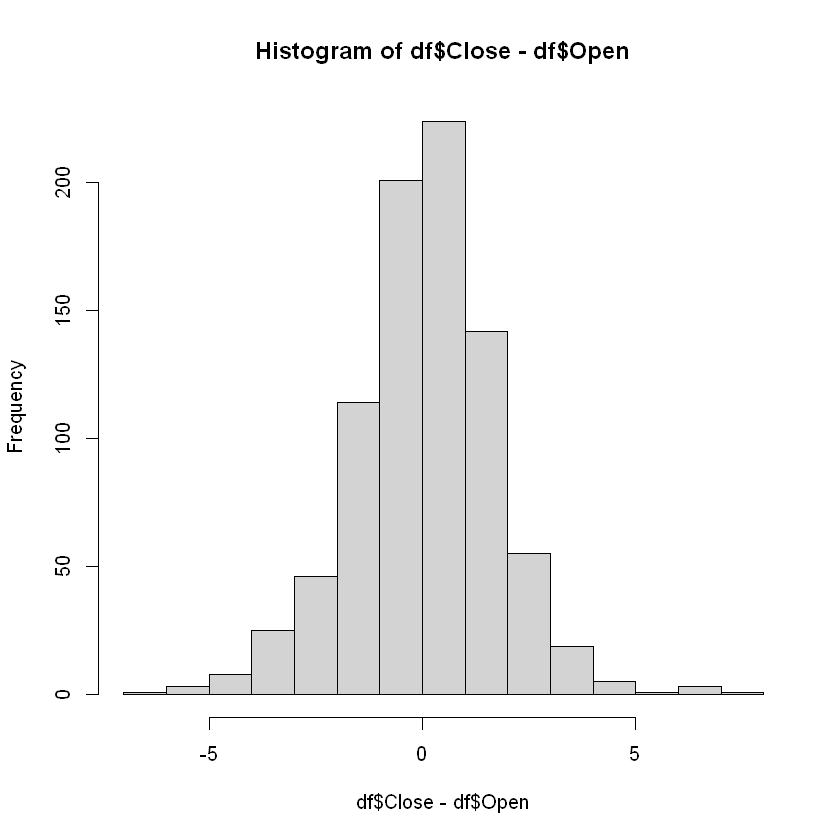

[1] "Szereg rozdzielczy:"



(-7,-5.5] (-5.5,-4] (-4,-2.5] (-2.5,-1]  (-1,0.5]   (0.5,2]   (2,3.5]   (3.5,5] 
        1        11        42       143       329       238        63        16 
  (5,6.5]   (6.5,8] 
        3         2 

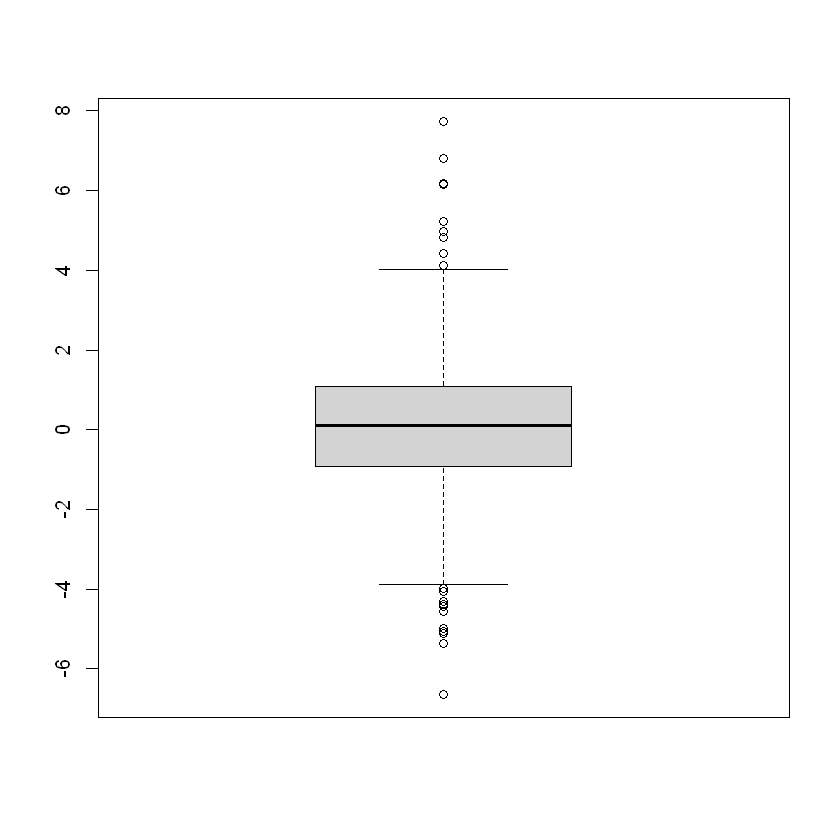

In [7]:
# szeregi rozdzielcze i histogramy
# domyślna wielkość koszów histogramu w R wyliczana jest metodą Sturge'a, tj. ceil(log2(n))+1.
# my użyjemy metody Friedmana-Diaconisa: h = 2*IQR(x)*n^(-1/3) zamiennie z metodą Sturge'a (zależnie od tego, która produkowała "lepszy wynik")
h1 <- hist(df$Close, breaks='FD')

h2 <- hist(df$High-df$Low, breaks='Sturge')
h3 <- hist(df$Close-df$Low, breaks='Sturge')
h4 <- hist(df$High-df$Close, breaks='FD')
h5 <- hist(df$Volume, breaks='Sturge')

h6 <- hist(df$Close-df$Open, breaks='Sturge')
h7 <- boxplot(df$Close-df$Open)
print("Szereg rozdzielczy:")
table(cut(df$Close-df$Open, breaks=seq.int(from=-7, to=8, by=1.5)))

Widać tutaj kilka ciekawych trendów - na początek należy zauważyć, że rozkład wartości akcji nie jest normalny, nie jest to też żaden typowy rozkład, który miałby "przyjemne" własności w naszej analizie. Co ciekawe rozkład różnicy Close-Open (tj. ile wzrosła/opadła wartość akcji danego dnia) wykazuje już rozkład w przybliżeniu normalny (co jest naturalnym i często obserwowanym zjawiskiem). Możemy traktować pary Open/Close dlatego traktować różnice danego dnia jako różnice w próbach before/after, co później zrobimy.

      Date                 Open             High             Low        
 Min.   :2020-01-02   Min.   : 52.82   Min.   : 53.35   Min.   : 50.44  
 1st Qu.:2020-11-02   1st Qu.: 84.58   1st Qu.: 85.98   1st Qu.: 82.63  
 Median :2021-09-07   Median :102.92   Median :104.47   Median :101.79  
 Mean   :2021-09-06   Mean   :103.70   Mean   :104.95   Mean   :102.49  
 3rd Qu.:2022-07-12   3rd Qu.:122.00   3rd Qu.:122.60   3rd Qu.:120.97  
 Max.   :2023-05-15   Max.   :151.25   Max.   :151.55   Max.   :148.90  
     Close            Volume         
 Min.   : 52.71   Min.   :  9312000  
 1st Qu.: 83.26   1st Qu.: 25540000  
 Median :103.10   Median : 31474650  
 Mean   :103.75   Mean   : 35407502  
 3rd Qu.:122.16   3rd Qu.: 40598125  
 Max.   :149.84   Max.   :123200000  

[1] 1.964274

[1] -0.0118589

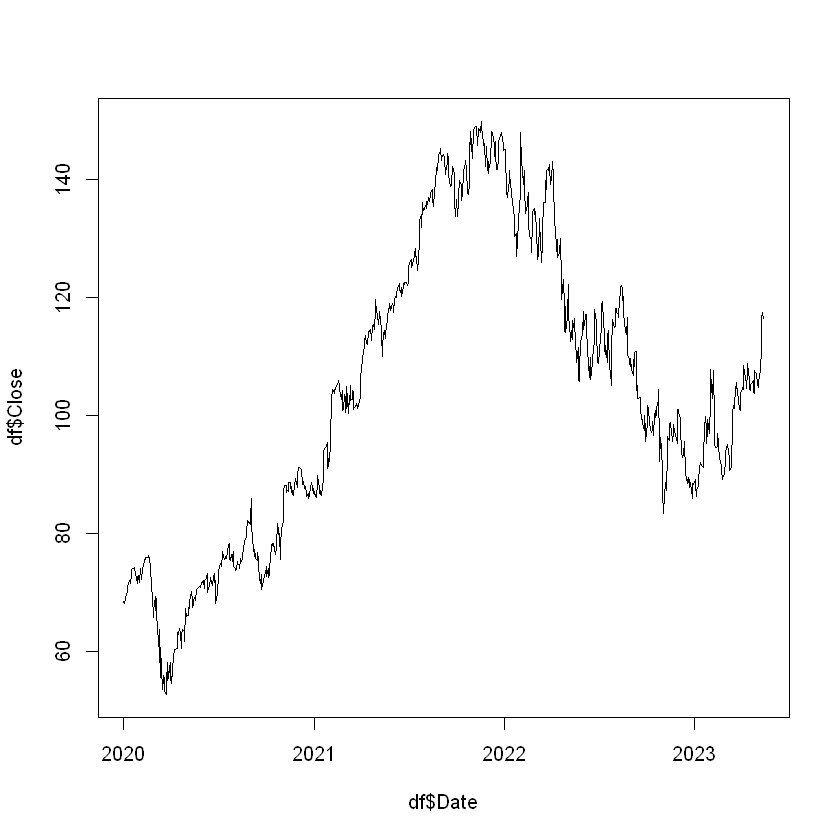

In [5]:
# statystyki opisowe
plot(df$Date, df$Close, type='n')
lines(df$Date, df$Close)
summary(df)
min_date <- df$Date[which.min(df$Close)]
max_date <- df$Date[which.max(df$Close)]
skewness(df$Volume)
skewness(df$Close-df$Open)

Tutaj widzimy różne dodatkowe pomocne statystyki - jedna z nich, mianownicie min/max na okresie od 2020 do 2022 pomoże nam w wyznaczeniu regresji dla tego okresu. Ponadto widać, że skośność rozkładu różnic Close-Open jest prawie zerowa, zaś rozkładu wolumenu - silnie skośna prawostronnie (ogon prawostronny).

# Regresja



Call:
lm(formula = Close ~ Date, data = reg_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5970  -3.8268   0.3646   4.3075  11.6959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.713e+03  2.814e+01  -96.41   <2e-16 ***
Date         1.508e-01  1.509e-03   99.96   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.412 on 417 degrees of freedom
Multiple R-squared:  0.9599,	Adjusted R-squared:  0.9598 
F-statistic:  9991 on 1 and 417 DF,  p-value: < 2.2e-16



Warning message in abline(a = sm, b = ib, col = "red"):
"only using the first two of 8 regression coefficients"


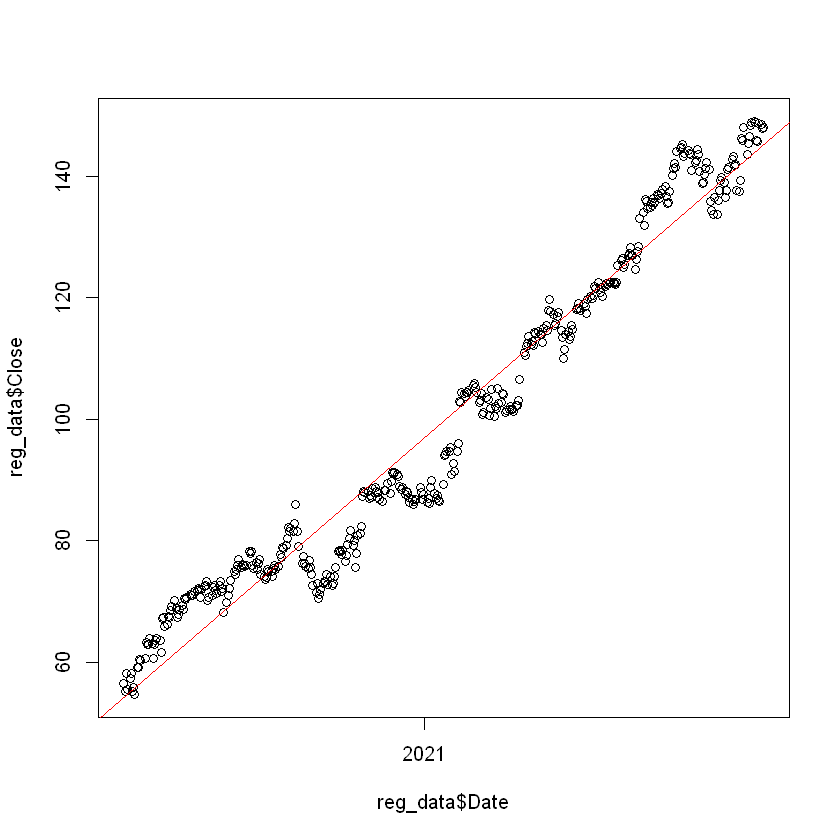


Call:
lm(formula = Close ~ Date, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.348 -17.466  -6.165  18.814  43.518 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.681e+02  3.977e+01  -14.29   <2e-16 ***
Date         3.559e-02  2.106e-03   16.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 21.76 on 846 degrees of freedom
Multiple R-squared:  0.2524,	Adjusted R-squared:  0.2515 
F-statistic: 285.6 on 1 and 846 DF,  p-value: < 2.2e-16


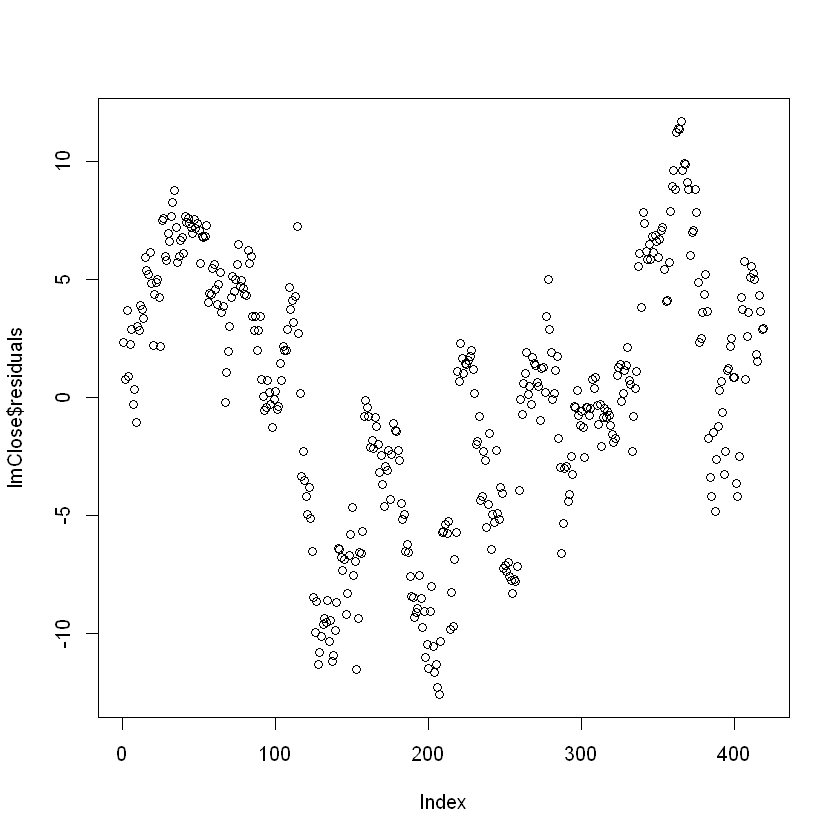

In [15]:
# regresja liniowa
reg_data <- subset(df, df$Date > min_date & df$Date < max_date)
lmClose <- lm(Close ~ Date, data=reg_data)

sm <- summary(lmClose)
ib <- sm$coefficients[1,1] # intercept b
sl <- sm$coefficients[2,1] # slope tan(x)
print(sm)
plot(reg_data$Date, reg_data$Close)
abline(a = sm, b = ib, col='red')
plot(lmClose$residuals)

# jako ciekawostka
lmAll <- lm(Close ~ Date, data=df)
summary(lmAll)

# Test regresji oraz wnioski
Funkcja lm wygodnie dla nas automatycznie przeprowadza wszystkie istotne testy na powstałej regresji. Przeprowadzany jest test F (ogólny dla całej regresji) oraz testy t-Studenta dla poszczególnych zmiennych - w tym wypadku zmienna niezależna jest jedna (Date).

Dla testu F na regresji:
hipoteza zerowa H0: 
hipoteza alternatywna H1:

Ze statystyki otrzymujemy wynik pval 2e-16 (w tym wypadku dla jednej zmiennej niezależnej test ogólny ~ test tej zmiennej), czyli bardzo niską wartość - to oznacza, że H0 zdecydowanie odrzucamy na rzecz H1. Stąd możemy zakładać, że wpływ Date na Close jest silnie liniowo zależny na tym rejonie czasu (2020-2022). Taka analiza może być jednak częściowo zgubna, gdyż same pval etc. nie pokazują perturbacji w tej "linii" - przy analizie resyduów widzimy jasno, że nie są one rozproszone zupełnie losowe, a raczej przypominają sinusoidalny sygnał z dużymi zakłóceniami - świadczy to o tym, że zwykła funkcja liniowa nie będzie przewidywać bardzo dobrze kształtu zależności na krótkich interwałach. Ponadto, jak wskazuje sam fakt, że musieliśmy "wyciąć" fragment danych, aby uzyskać taką regresję, sens użycia takich narzędzi do predykcji rynkowych może być kwestionowany - tzn. podlega on dużej "losowości". Mimo, że Rsq=0.96 dla okresu 2020-2022, to już dla 2020-2023 równa się ono Rsq=0.25. Nawet gdybyśmy tworzyli specjalne regresji dla każdej "górki", to zachodzi tu pytanie, jak przewidywać, kiedy nastąpi kolejny spadek. Tymi zagadnieniami zajmuje się jednak ekonometria, a i ona zdaje się nie znać konkretnych odpowiedzi (z powodu czystej chaotyczności rynku).

# Test t-Studenta
Przeprowadzimy tutaj test t-Studenta dla dwóch zbiorowości sparowanych - dodatkowo przeprowadzimy też test Wilcoxona, gdyż rozkłady Open oraz Close nie są normalne (choć rozkład Close-Open jest normalny, co teoretycznie daje możliwość przeprowadzenia testu t). Naszą hipotezą zerową testu t jest:

H0: d(Close-Open) = 0 (czyli, że na ogół wartość akcji danego dnia nie zmieniała się)

Naszą hipotezą alternatywną jest zaś:

H1: d(Close-Open) > 0 (czyli, że na ogół wartość akcji danego dnia zmieniała się - jesteśmy konserwatywni i badamy jak na razie tylko zmianę).

In [9]:
# dodatkowe informacje
mean(df$Close)
mean(df$Open)
mean(df$Close-df$Open)
sd(df$Close)
sd(df$Open)
sd(df$Close-df$Open)
var.test(df$Close, df$Open)

[1] 103.7512

[1] 103.6964

[1] 0.05482424

[1] 25.14957

[1] 25.22544

[1] 1.673424


	F test to compare two variances

data:  df$Close and df$Open
F = 0.99399, num df = 847, denom df = 847, p-value = 0.9302
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8686583 1.1374132
sample estimates:
ratio of variances 
         0.9939937 


In [12]:
# test t-Studenta
t.test(df$Close, df$Open, alternative='two.sided', paired=TRUE, conf.level=0.95)
wilcox.test(df$Close, df$Open, alternative='two.sided', paired=TRUE, conf.level=0.95)
wilcox.test(df$Close, df$Open, alternative='greater', paired=TRUE, conf.level=0.95)


	Paired t-test

data:  df$Close and df$Open
t = 0.95404, df = 847, p-value = 0.3403
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.05796745  0.16761593
sample estimates:
mean of the differences 
             0.05482424 



	One Sample t-test

data:  df$Close - df$Open
t = 0.95404, df = 847, p-value = 0.3403
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.05796745  0.16761593
sample estimates:
 mean of x 
0.05482424 



	Wilcoxon signed rank test with continuity correction

data:  df$Close and df$Open
V = 189956, p-value = 0.1282
alternative hypothesis: true location shift is not equal to 0



	Wilcoxon signed rank test with continuity correction

data:  df$Close and df$Open
V = 189956, p-value = 0.06412
alternative hypothesis: true location shift is greater than 0


Z testu F wynika jasno, że wariancje tych dwóch zbiorów (Open i Close) są praktycznie identyczne (co ma sens - Open i Close są ze sobą bezpośrednio związane i byłoby to bardzo dziwne, gdyby ich wariancje czy średnie były od siebie różne), gdyż pval=0.93.
Z testu t na parach wynika (pval=0.34), że nie ma jasnych przesłanek, aby odrzucić H0, tj. nie ma dowodów na to, żeby uznać, że na ogół występują znaczące zmiany w wartości akcji w ciągu dnia. Jest to spowodowane prawdopodobnie tym, że tak naprawdę test t dla sparowanych zbiorów bada rozkład różnic sensu stricto, które to prawie idealnie wpasowują się w mu=0. Jest to ciekawa obserwacja szczególnie dlatego, że jak wiemy ceny na ogół wzrastały (należy pamiętać, że cena Open następnego dnia to niekoniecznie cena Close wcześniejszego etc.). Należy jednak zwrócić uwagę, że gdy spróbujemy potraktować dane nieparametrycznie pval o wiele spada (pval=0.128 dla dwustronnego). 

# Wnioski
Główny wniosek, który nasuwa się zapewne przy analizie tego typu temporalnym, monetarnych danych jest oczywisty: dane te są ciężkie do "przewidzenia", dają złudne efekty i są chaotyczne. Wyciąganie wniosków o rynkach jest trudne, tendencje są chaotyczne i nieprzewidywalne. Fakt, że ciężko udowodnić nawet (jak by się zdawało) zdroworozsądkowe tezy przy pomocy podstawowych testów tylko to potwierdza.

Dodatkowymi aspektami, które warto byłoby zbadać są zależności między danymi (korelacja Pearsona vs Spearmana?), być może również testowanie rozkładów różnych zmiennych (przykładowo niektóre zmienne mogą mieć rozkład log-normalny - https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications). Ciekawostka - dla pełnego rozkładu indeksu GOOGL (pełny zbiór danych - od 2004 do 2023) histogram faktycznie przypomina w miarę rozkład log-normalny z dużą kurtozą K>0. Kolejną ciekawostką jest też to, że kurtoza Close-Open jest ekstremalnie duża dla danych z całego zakresu od 2004.

[1] 1.366506

[1] 4.011432

[1] 17.92074

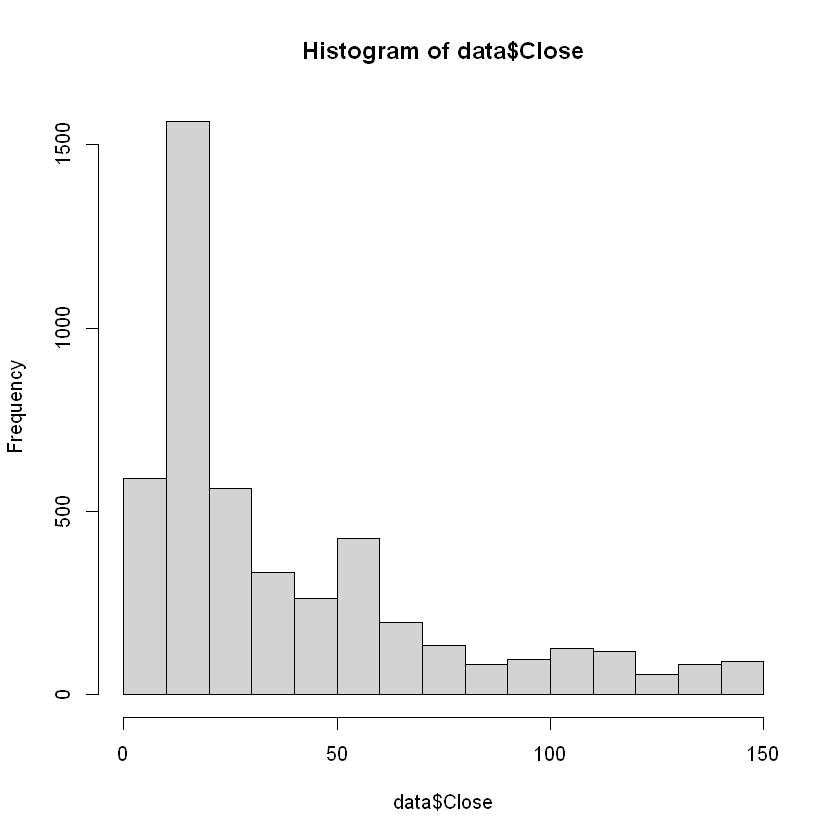

In [22]:
hist(data$Close)
skewness(data$Close)
kurtosis(data$Close)
kurtosis(data$Close-data$Open)